# **AI for Climate Change: Mitigate Greenhouse Gases Emissions by reducing the energy consumption of buildings**

In [ ]:
# Arrays and DataFrames
import numpy as np  # deals with arrays i-e matrices
import pandas as pd  # deals with tabualr data
import os

# Data Visualization
import matplotlib.pyplot as plt  # The most commonly used visualization library
import seaborn as sns  # it is Matplotlib under the hood. Handy for statistical plotting.
# It is a magic function that renders the figure in a notebook (instead of displaying a dump of the figure object).
%matplotlib inline   
import missingno as mno  # Library to visualize missing values in a column - works well if the number of columns are below 50 

# Feature selection tools and Encoders
import lightgbm
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# this ignores the depreciation warnings etc
import warnings
warnings.filterwarnings("ignore")

In [ ]:
os.getcwd()

'/content'

---

---

# **Feature Engineering**

In [ ]:
sc_train_data = pd.read_parquet("scale_encoded_train.parquet")

In [ ]:
sc_train_data.head()

encode__State_Factor_State_10  encode__State_Factor_State_11  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   encode__State_Factor_State_2  encode__State_Factor_State_4  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   encode__State_Factor_State_6  encode__State_Factor_State_8  \
0                             0                             0   
1                             0                             0   
2                             0                             0   
3                             0                             0   
4                             0                             0   

   encode__facility_type_Lodging_Hotel  \
0                                    0   
1                                    0   
2                                    0   
3                                    0   
4                                    0   

   encode__facility_type_Multifamily_Uncategorized  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   encode__facility_type_Office_Uncategorized  encode__facility_type_Other  \
0                                           0                            1   
1                                           0                            1   
2                                           0                            1   
3                                           0                            0   
4                                           0                            1   

   ...  scale__days_below_0F  scale__days_above_80F  scale__days_above_90F  \
0  ...             -0.302936              -2.717656              -1.284612   
1  ...             -0.302936              -2.717656              -1.284612   
2  ...             -0.302936              -2.717656              -1.284612   
3  ...             -0.302936              -2.717656              -1.284612   
4  ...             -0.302936              -2.717656              -1.284612   

   scale__days_above_100F  scale__days_above_110F  \
0               -0.124112               -0.017181   
1               -0.124112               -0.017181   
2               -0.124112               -0.017181   
3               -0.124112               -0.017181   
4               -0.124112               -0.017181   

   scale__direction_max_wind_speed  scale__direction_peak_wind_speed  \
0                        -0.317352                         -0.299344   
1                        -0.317352                         -0.299344   
2                        -0.317352                         -0.299344   
3                        -0.317352                         -0.299344   
4                        -0.317352                         -0.299344   

   scale__max_wind_speed  scale__days_with_fog  scale__site_eui  
0              -0.314077              0.257072         2.851221  
1              -0.314077             -3.281746        -0.962742  
2              -0.314077             -3.281746        -0.993753  
3              -0.314077             -3.281746        -0.586692  
4              -0.314077              0.257072        -1.350704  

[5 rows x 70 columns]

In [ ]:
cols = sc_train_data.columns.tolist()

### Prepare the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = sc_train_data.drop("scale__site_eui", axis=1)
y = sc_train_data["scale__site_eui"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

## **Random Forest**

**The Random Forest algorithm has built-in feature importance which can be computed in two ways:**

- **Gini importance** (or mean decrease impurity), which is computed from the Random Forest structure. Let’s look how the Random Forest is constructed. It is a set of Decision Trees. Each Decision Tree is a set of internal nodes and leaves. In the internal node, the selected feature is used to make decision how to divide the data set into two separate sets with similars responses within. The features for internal nodes are selected with some criterion, which for classification tasks can be gini impurity or infomation gain, and for regression is variance reduction. We can measure how each feature decrease the impurity of the split (the feature with highest decrease is selected for internal node). For each feature we can collect how on average it decreases the impurity. The average over all trees in the forest is the measure of the feature importance. This method is available in scikit-learn implementation of the Random Forest (for both classifier and regressor). It is worth to mention, that in this method we should look at relative values of the computed importances. This biggest advantage of this method is a speed of computation - all needed values are computed during the Radom Forest training. The drawbacks of the method is to tendency to prefer (select as important) numerical features and categorical features with high cardinality. What is more, in the case of correlated features it can select one of the feature and neglect the importance of the second one (which can lead to wrong conclusions).


- **Mean Decrease Accuracy** - is a method of computing the feature importance on permuted out-of-bag (OOB) samples based on mean decrease in the accuracy. This method is not implemented in the scikit-learn package. The very similar to this method is permutation based importance described below in this post.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [ ]:
## Feature scaling
rf = RandomForestRegressor(n_estimators=100)


In [ ]:
rf.fit(X_train, y_train) #Fit the Random Forest Regressor with 100 Decision Trees:

RandomForestRegressor()

In [ ]:
# To get the feature importances from the Random Forest model use the feature_importances_ attribute:

rf.feature_importances_

array([3.06054714e-07, 3.26246461e-04, 8.85530436e-04, 5.95771357e-03,
       2.93003593e-03, 1.38115585e-03, 4.75852887e-03, 9.38170711e-03,
       8.90436447e-03, 1.90732211e-02, 2.68221289e-03, 3.15209884e-01,
       1.45636193e-01, 2.57758760e-01, 4.44191433e-02, 7.33441540e-03,
       9.21751495e-03, 2.59577939e-03, 3.15082983e-03, 4.15797103e-03,
       2.95750459e-03, 3.28390569e-03, 2.09210955e-03, 2.88700326e-03,
       3.02194543e-03, 3.67786535e-03, 2.42900623e-03, 3.25072385e-03,
       2.77766619e-03, 2.19058958e-03, 2.91382192e-03, 3.64037082e-03,
       2.31098954e-03, 2.05743834e-03, 3.06387817e-03, 2.53589853e-03,
       1.77637752e-03, 2.63452668e-03, 1.90652603e-03, 2.33587094e-03,
       5.53685170e-03, 3.03141905e-03, 2.41954004e-03, 3.16971348e-03,
       2.79893894e-03, 2.60088717e-03, 3.44469390e-03, 3.79032499e-03,
       2.05765298e-03, 2.07971592e-03, 2.26509687e-03, 2.19151517e-03,
       4.56596804e-03, 4.97475924e-03, 5.44798817e-03, 4.29389093e-03,
      

<BarContainer object of 69 artists>

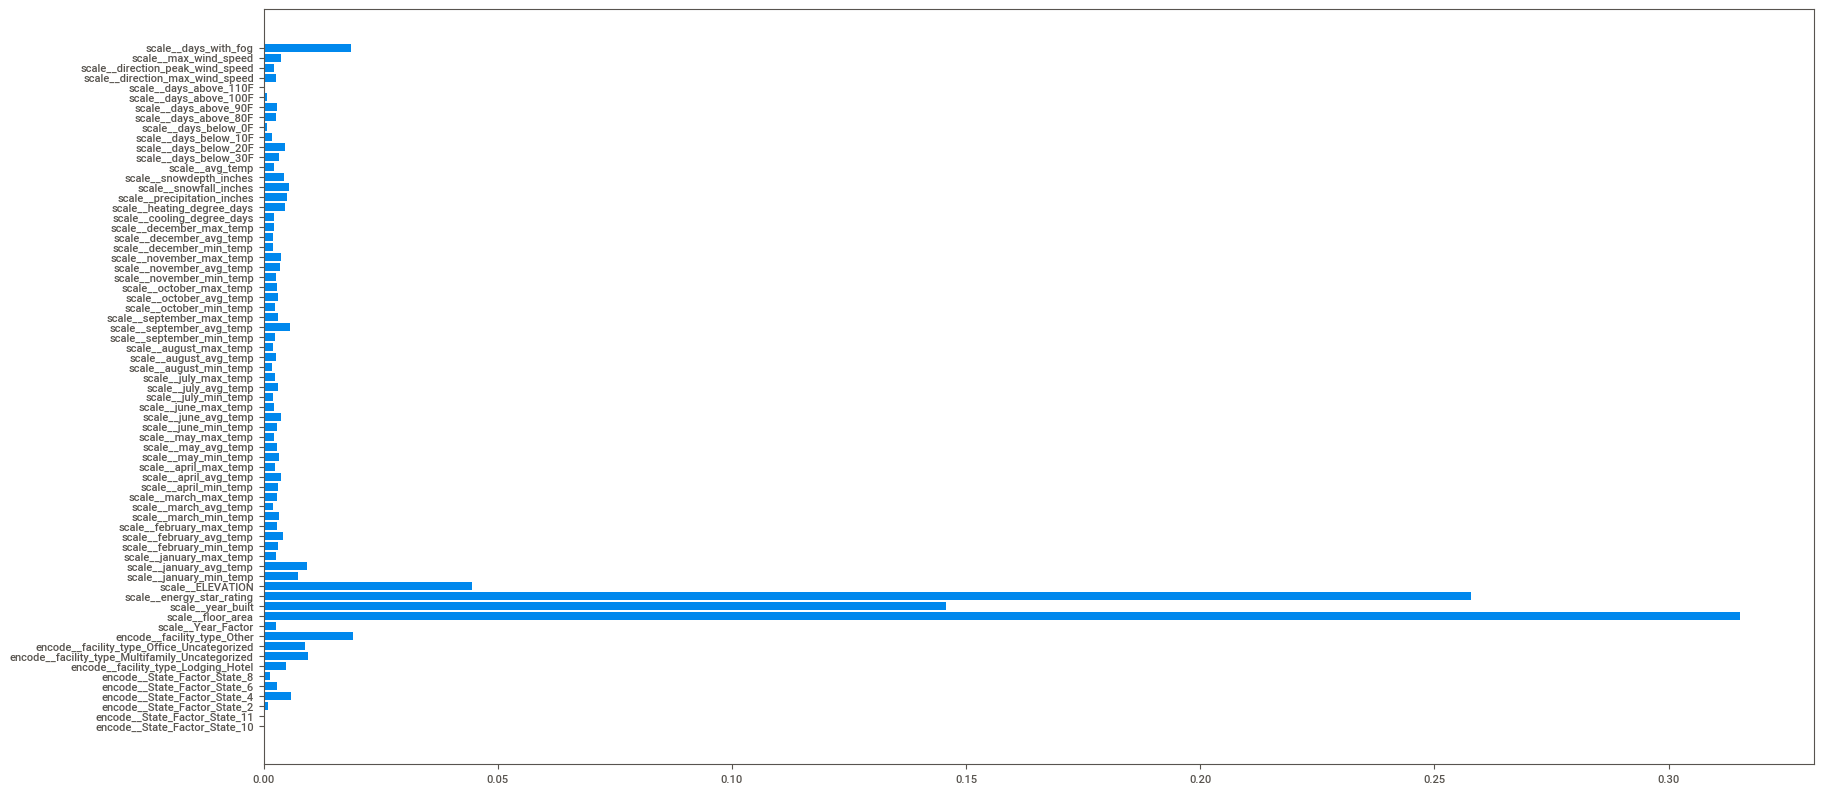

In [ ]:
plt.figure(figsize=(20,10))
plt.barh(X_train.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

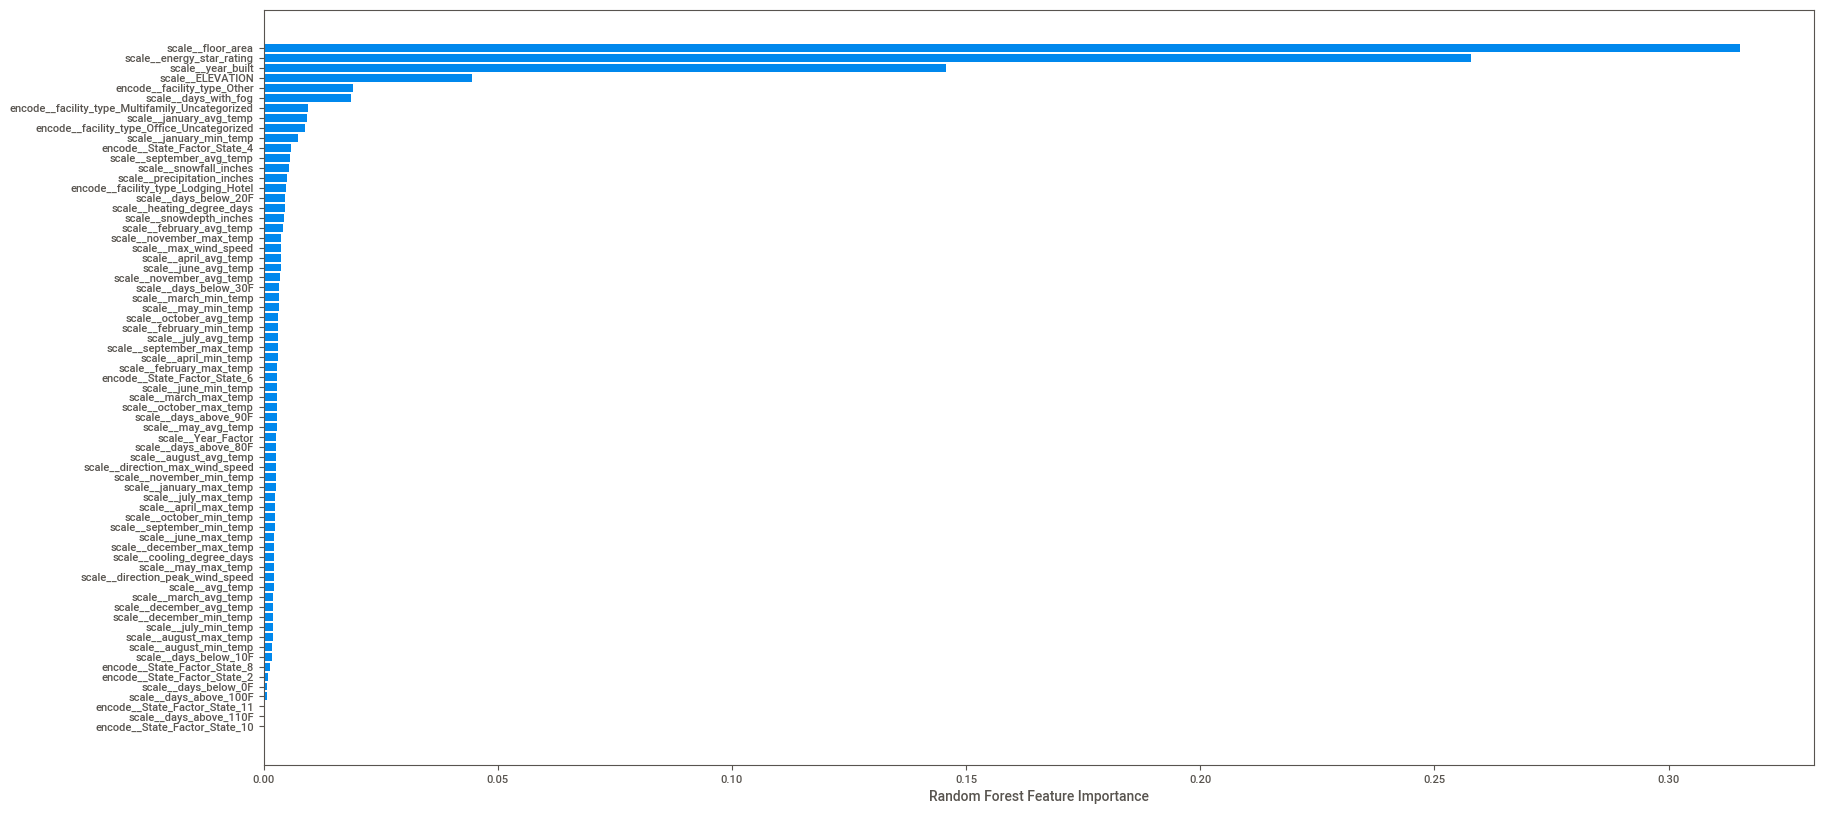

In [ ]:
plt.figure(figsize=(20,10))

sorted_idx = rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")



---

---

---

---

## **Permutation Based Feature Importance**

The permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. It is implemented in scikit-learn as permutation_importance method. As arguments it requires trained model (can be any model compatible with scikit-learn API) and validation (test data). This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

The permutation importance can be easily computed:

In [ ]:
perm_importance = permutation_importance(rf, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

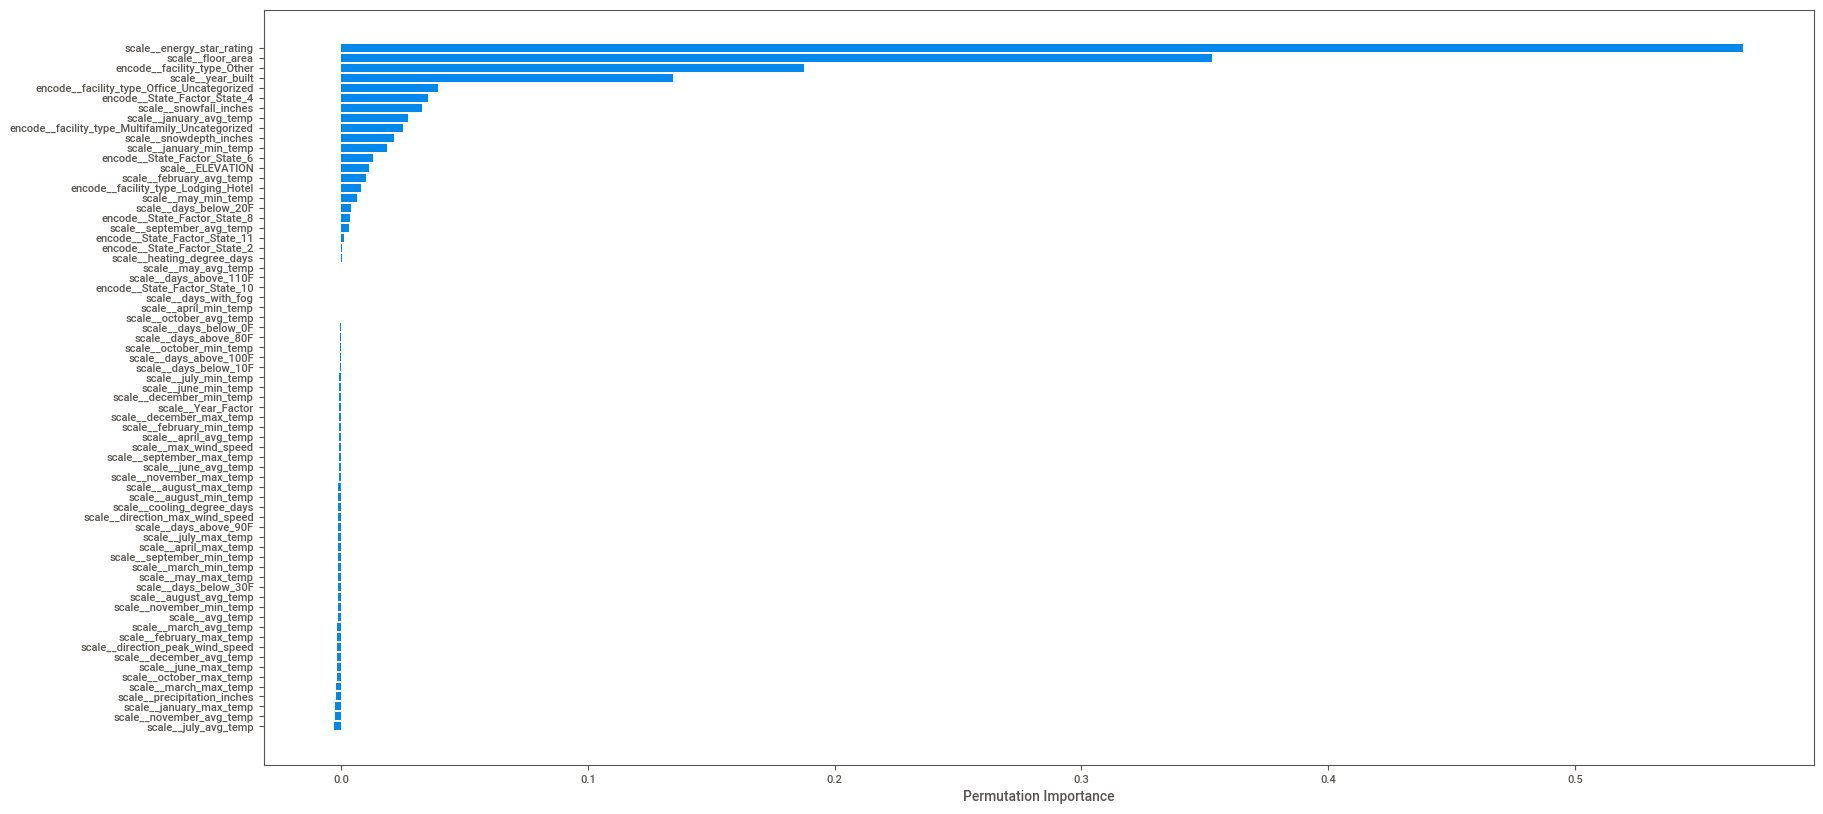

In [ ]:
plt.figure(figsize=(20,10))
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")